In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Runtime vs. Revenue (TMDB)

In [2]:
#import the data
tmdb = pd.read_csv('zippedData/tmdb_5000_movies.csv')

In [3]:
#look at the data
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
#Dropping the unnecessary columns
tmdb_new= tmdb.drop(columns=["budget", "release_date", "genres", "tagline", "id", "keywords", "popularity", "homepage", "original_language", "original_title", "overview", "production_companies", "production_countries", "spoken_languages", "status", "vote_average", "vote_count"])
tmdb_new

,revenue,runtime,title
0,2787965087,162.0,Avatar
1,961000000,169.0,Pirates of the Caribbean: At World's End
2,880674609,148.0,Spectre
3,1084939099,165.0,The Dark Knight Rises
4,284139100,132.0,John Carter
...,...,...,...
4798,2040920,81.0,El Mariachi
4799,0,85.0,Newlyweds
4800,0,120.0,"Signed, Sealed, Delivered"
4801,0,98.0,Shanghai Calling


In [5]:
#check for null values
tmdb_new.isna().sum()

revenue    0
runtime    2
title      0
dtype: int64

In [6]:
#drop rows with null values
tmdb_new.dropna(inplace=True)

Because there are only 2 null values out of 4,803, it is a safe assuption that dropping those two rows will not change our data. 

In [7]:
#sanity check- make sure the null values have been dropped
tmdb_new.isnull().sum()

revenue    0
runtime    0
title      0
dtype: int64

In [61]:
#look at the data
tmdb_new.info()

In [9]:
#drop rows that have values of 0 for revenue or runtime, as these values are the same as nulls
tmdb_new.drop(tmdb_new.query('revenue == 0').index, inplace=True)
tmdb_new.drop(tmdb_new.query('runtime == 0').index, inplace=True)

In [10]:
#sanity check- make sure the rows with values of 0 have have been dropped
tmdb_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3375 entries, 0 to 4798
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   revenue  3375 non-null   int64  
 1   runtime  3375 non-null   float64
 2   title    3375 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 105.5+ KB


### We now have 3375 entries as opposed to the 4801 above

In [11]:
#pull out the top 100 movies by revenue 
top_100_revenue = tmdb_new.sort_values(by='revenue', ascending=False)[:100]

In [12]:
#look at the data
top_100_revenue.head()

,revenue,runtime,title
0,2787965087,162.0,Avatar
25,1845034188,194.0,Titanic
16,1519557910,143.0,The Avengers
28,1513528810,124.0,Jurassic World
44,1506249360,137.0,Furious 7


In [13]:
#sort the rest of the data by revenue
other_3275_revenue = tmdb_new.sort_values(by='revenue', ascending=False)[100:]

In [14]:
#look at the data
other_3275_revenue.head()

,revenue,runtime,title
79,623933331,124.0,Iron Man 2
118,623722818,111.0,Ratatouille
1810,611899420,127.0,The Passion of the Christ
886,609841637,108.0,Mamma Mia!
160,609123048,102.0,How to Train Your Dragon 2


<AxesSubplot:xlabel='runtime', ylabel='revenue'>

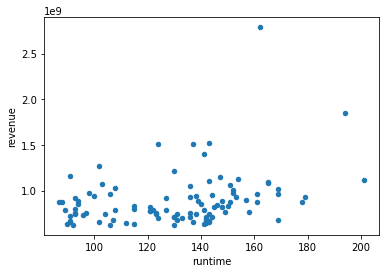

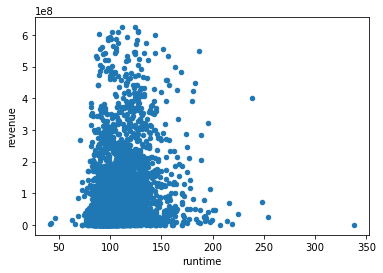

In [15]:
#plot the runtimes vs revenue for the top 100 movies and the other 3,275 movies
top_100_revenue.plot.scatter(x = 'runtime', y = 'revenue')
other_3275_revenue.plot.scatter(x = 'runtime', y = 'revenue')

## Release Month vs. World Wide Gross Revenue (TN)

In [16]:
#import the data
tn = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [17]:
#look at the data
tn.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [18]:
#separate the month of the movie's release from the rest of the date
tn['release_month'] = pd.DatetimeIndex(tn['release_date']).month
tn['release_month']

0       12
1        5
2        6
3        5
4       12
        ..
5777    12
5778     4
5779     7
5780     9
5781     8
Name: release_month, Length: 5782, dtype: int64

In [19]:
#check for null values types of data for each column
tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
 6   release_month      5782 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 316.3+ KB


### Here we see there are no null values, this data has been pre- cleaned for nulls

In [20]:
#check to see if there are any values of 0 for worldwide gross or release month. 
#Values of 0 are the same as nulls so the rows will be dropped

tn.drop(tn.query('worldwide_gross == 0').index, inplace=True) 
tn.drop(tn.query('release_month == 0').index, inplace=True)

In [21]:
#check to see if any rows were dropped 
tn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
 6   release_month      5782 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 521.4+ KB


### This table has the same number of rows, so there werent any values of 0

### Here we also see the "worldwide_gross" column is type is object.  We need to change it to an integer to be able to graph it 

In [22]:
#change worldwide gross from an object to an int

tn['gross_clean'] = tn['worldwide_gross'].str.replace('$','').str.replace(',','')
tn['gross_clean'] = pd.to_numeric(tn['gross_clean'])
tn['gross_clean']

0       2776345279
1       1045663875
2        149762350
3       1403013963
4       1316721747
           ...    
5777             0
5778        240495
5779          1338
5780             0
5781        181041
Name: gross_clean, Length: 5782, dtype: int64

code citation: 
the code to change the gross revenue from an object to an integer was adapted from:  https://github.com/xiaohua-su/Film-Analysis/blob/main/Analysis_of_Films.ipynb

In [23]:
#sanity check- confirm that the gross_clean is an integer
tn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
 6   release_month      5782 non-null   int64 
 7   gross_clean        5782 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 566.5+ KB


# A sidenote as to why I used worldwide gross revenue as opposed to the domestic gross revenue

### One of the advantages of 21st century technology is that people can watch content that is made in other countries and companies can profit from this. 

### To illustrate the amount of gross revenue made from movies outside of the U.S, I subtracted worldwide gross from the domestic gross.

In [63]:
#change domestic gross from an object to an int
tn['dom_gross_clean'] = tn['domestic_gross'].str.replace('$','').str.replace(',','')
tn['dom_gross_clean'] = pd.to_numeric(tn['dom_gross_clean'])
tn['dom_gross_clean']

0       760507625
1       241063875
2        42762350
3       459005868
4       620181382
          ...    
5777            0
5778        48482
5779         1338
5780            0
5781       181041
Name: dom_gross_clean, Length: 5781, dtype: int64

In [64]:
#calculate foreign gross revenue
foreign_gross_revenue = tn["gross_clean"] - tn["dom_gross_clean"]

foreign_gross_revenue.sort_values(ascending=False).head(20)

0      2015837654
42     1548844451
6      1369318718
66     1165715774
5      1116648995
22     1009081502
33      996584239
260     960500000
3       944008095
26      894656350
112     888053039
155     871731901
36      858600000
672     824290403
135     811832833
47      806400000
51      806166704
1       804600000
63      771400000
629     770103450
dtype: int64

As we can see from this data, a lot of revenue is generated from other countries, so limiting our data to just domestic gross may not give us a full picture. 

### Back to comparing release date to worldwide gross revenue:

In [65]:
#pull out the top 100 movies based on worldwide gross revenue 
tn_top100 = tn.sort_values(by='gross_clean', ascending=False)[:100]
tn_top100

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,gross_clean,dom_gross_clean,p_budget_clean,net_profit,return_on_investment
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",12,2776345279,760507625,425000000,2351345279,553.257713
42,43,"Dec 19, 1997",Titanic,"$200,000,000","$659,363,944","$2,208,208,395",12,2208208395,659363944,200000000,2008208395,1004.104198
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",12,2053311220,936662225,306000000,1747311220,571.016739
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",4,2048134200,678815482,300000000,1748134200,582.711400
33,34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864",6,1648854864,652270625,215000000,1433854864,666.909239
...,...,...,...,...,...,...,...,...,...,...,...,...
54,55,"May 23, 2014",X-Men: Days of Future Past,"$200,000,000","$233,921,534","$747,862,775",5,747862775,233921534,200000000,547862775,273.931388
196,97,"Jun 8, 2012",Madagascar 3: Europe's Most Wanted,"$145,000,000","$216,391,482","$746,921,271",6,746921271,216391482,145000000,601921271,415.118118
99,100,"Aug 5, 2016",Suicide Squad,"$175,000,000","$325,100,054","$746,059,887",8,746059887,325100054,175000000,571059887,326.319935
52,53,"Jun 21, 2013",Monsters University,"$200,000,000","$268,488,329","$743,588,329",6,743588329,268488329,200000000,543588329,271.794164


In [66]:
#Get the value counts of how many of the top 100 movies came out each month, as a percentage
tn_top100_mc = tn_top100['release_month'].value_counts(normalize = True).sort_index()
tn_top100_mc

2     0.02
3     0.05
4     0.04
5     0.24
6     0.18
7     0.16
8     0.02
10    0.01
11    0.15
12    0.13
Name: release_month, dtype: float64

In [68]:
# append the series to have values of 0 listed for the months 
# that don't have any movies premiered that month (January and September)
tn_top100_mc = np.array([0,0.02,0.05,0.04,0.24,0.18,0.16,0.02,0,0.01,0.15,0.13])
tn_top100_mc

array([0.  , 0.02, 0.05, 0.04, 0.24, 0.18, 0.16, 0.02, 0.  , 0.01, 0.15,
       0.13])

In [69]:
#Sort the rest of the movies based on domestic gross revenue 
other_5682 = tn.sort_values(by='gross_clean', ascending=False)[100:]
other_5682

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,gross_clean,dom_gross_clean,p_budget_clean,net_profit,return_on_investment
100,1,"May 29, 2009",Up,"$175,000,000","$293,004,164","$731,463,377",5,731463377,293004164,175000000,556463377,317.979073
82,83,"Dec 9, 2005","The Chronicles of Narnia: The Lion, the Witch ...","$180,000,000","$291,710,957","$720,539,572",12,720539572,291710957,180000000,540539572,300.299762
115,16,"Apr 4, 2014",Captain America: The Winter Soldier,"$170,000,000","$259,746,958","$714,401,889",4,714401889,259746958,170000000,544401889,320.236405
116,17,"Jul 11, 2014",Dawn of the Planet of the Apes,"$170,000,000","$208,545,589","$710,644,566",7,710644566,208545589,170000000,540644566,318.026215
55,56,"May 2, 2014",The Amazing Spider-Man 2,"$200,000,000","$202,853,933","$708,996,336",5,708996336,202853933,200000000,508996336,254.498168
...,...,...,...,...,...,...,...,...,...,...,...,...
3758,59,"Dec 31, 2013",Re-Kill,"$9,500,000",$0,$0,12,0,0,9500000,-9500000,-100.000000
5373,74,"Sep 8, 2006",Iraq for Sale: The War Profiteers,"$775,000",$0,$0,9,0,0,775000,-775000,-100.000000
4883,84,"Dec 31, 2010",Lies in Plain Sight,"$2,100,000",$0,$0,12,0,0,2100000,-2100000,-100.000000
5370,71,"Jan 9, 2015",Vessel,"$800,000",$0,$0,1,0,0,800000,-800000,-100.000000


In [70]:
#Get the value counts of how many of the rest of the movies came out each month, as a percentage
other_5682_mc = tn['release_month'].value_counts(normalize = True).sort_index()
other_5682_mc

1     0.060024
2     0.067808
3     0.081301
4     0.078533
5     0.070403
6     0.082685
7     0.076111
8     0.085798
9     0.085279
10    0.099118
11    0.084069
12    0.128870
Name: release_month, dtype: float64

In [71]:
#setting the labels for my x-axis 
x_axis = other_5682_mc.index.to_numpy()
x_axis

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

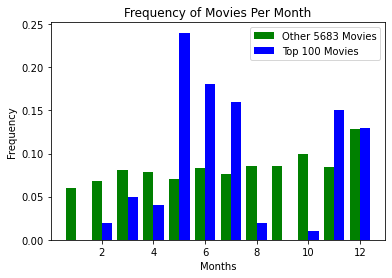

In [72]:
fig, ax = plt.subplots()
ax.bar(x_axis -0.2, other_5682_mc.values, width = .4, color = "green")
ax.bar(x_axis +0.2, tn_top100_mc, width = .4, color = "blue")
ax.set_xlabel('Months')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Movies Per Month')
ax.legend(["Other 5683 Movies", "Top 100 Movies"], loc=0);

A much higher percentage of the top 100 gross movies premeried in months 5, 6, 7, 11 and 12
The movies not in the top 100 are much more evenly distributed throughout the year. 

## Production Budget vs. Net Profit (TN)

In [73]:
#change production budget from an object to an int
tn['p_budget_clean'] = tn['production_budget'].str.replace('$','').str.replace(',','')
tn['p_budget_clean'] = pd.to_numeric(tn['p_budget_clean'])
tn['p_budget_clean']

0       425000000
1       410600000
2       350000000
3       330600000
4       317000000
          ...    
5777         7000
5778         6000
5779         5000
5780         1400
5781         1100
Name: p_budget_clean, Length: 5781, dtype: int64

In [74]:
#calculate net profit
tn['net_profit'] = tn['gross_clean'] - tn['p_budget_clean']
tn['net_profit']

0       2351345279
1        635063875
2       -200237650
3       1072413963
4        999721747
           ...    
5777         -7000
5778        234495
5779         -3662
5780         -1400
5781        179941
Name: net_profit, Length: 5781, dtype: int64

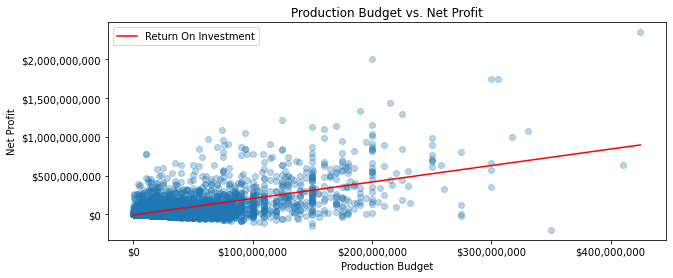

In [75]:
#graph production budget vs net profit
fig, ax = plt.subplots (figsize = (10, 4))
ax.scatter(tn['p_budget_clean'], tn['net_profit'], alpha = 0.3)

plt.ticklabel_format(style='plain', axis = 'x')
plt.ticklabel_format(style='plain', axis = 'y')

ax.set_title('Production Budget vs. Net Profit')
ax.set_xlabel('Production Budget')
ax.set_ylabel('Net Profit')

ax.xaxis.set_major_formatter('${x:,.0f}')
ax.yaxis.set_major_formatter('${x:,.0f}')

x=tn['p_budget_clean']
y=tn['net_profit']
m, b = np.polyfit(x,y,1)
plt.plot(x, m*x + b, c="red")
plt.legend(['Return On Investment']);